<a href="https://colab.research.google.com/github/rida-manzoor/Brain-Abnormal-Cell-Detection/blob/main/g1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_name = "./gdrive/MyDrive/data"

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import metrics 
from keras import losses 
from matplotlib.pyplot import imshow
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, Lambda
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from glob import glob
from tensorflow.keras.optimizers import RMSprop

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/data", output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 3000 files [00:48, 61.90 files/s] 


In [ ]:
#Resizing image
IMAGE_SIZE =[224,224]

valid_path='/content/output/val'
train_path='content/output/train'

In [ ]:
#Adding preprocessing layer in front of VGG
inception_v3 = InceptionV3(input_shape=IMAGE_SIZE +[3], include_top = False, weights = "imagenet")

#Don't train existing weights
for layers in inception_v3.layers:
  layers.trainable=False

# Useful for getting number of classes
folders=glob('output/train/*')

# Our layer
x = Flatten()(inception_v3.output)
x= Dense(len(folders), activation='relu')(x)
#x=dropout(0.2)(x)
#x=Dense(1,activation='sigmoid')(x)
prediction = Dense(len(folders),activation='sigmoid')(x)

# Create model object
model=Model(inputs=inception_v3.input,outputs=prediction)

model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
# Use image Data Generator to inport images from dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size=(224,224),
                                                 batch_size=34,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/output/val',
                                            target_size=(224,224),
                                            batch_size=34,
                                            class_mode='categorical')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
71/71 [==============================] - 309s 4s/step - loss: 0.7257 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/15
71/71 [==============================] - 302s 4s/step - loss: 0.6974 - accuracy: 0.5125 - val_loss: 0.6546 - val_accuracy: 0.7441
Epoch 3/15
71/71 [==============================] - 302s 4s/step - loss: 0.6406 - accuracy: 0.8021 - val_loss: 0.6563 - val_accuracy: 0.7265
Epoch 4/15
71/71 [==============================] - 302s 4s/step - loss: 0.6173 - accuracy: 0.8692 - val_loss: 0.6142 - val_accuracy: 0.9235
Epoch 5/15
71/71 [==============================] - 302s 4s/step - loss: 0.6033 - accuracy: 0.9083 - val_loss: 0.6087 - val_accuracy: 0.8529
Epoch 6/15
71/71 [==============================] - 302s 4s/step - loss: 0.5941 - accuracy: 0.9196 - val_loss: 0.6287 - val_accuracy: 0.8676
Epoch 7/15
71/71 [==============================] - 302s 4s/step - loss: 0.5884 - accuracy: 0.9250 - val_loss: 0.5785 - val_accuracy: 0.9706
Epoch 8/15
71

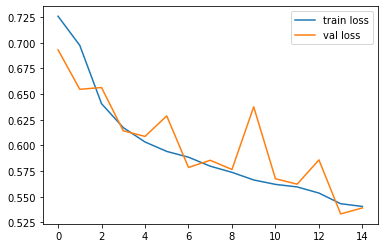

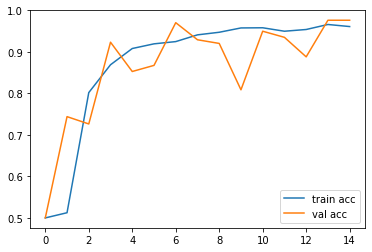

<Figure size 432x288 with 0 Axes>

In [ ]:
# Fit the model
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=len(training_set),
    validation_steps=10
)

#Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

#Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('./drive/MyDrive/model1_googlenet.h5')